# facebook/detr-resnet-50

* DEtection TRansformer (DETR) model trained end-to-end on COCO 2017 object detection (118k annotated images).
* https://huggingface.co/facebook/detr-resnet-50

In [2]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}")

c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\73915\.conda\envs\open_editor\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


c:\Users\73915\.conda\envs\open_editor\lib\site-packages\transformers\models\detr\image_processing_detr.py:780: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


Detected remote with confidence 0.998 at location [40.16, 70.81, 175.55, 117.98]
Detected remote with confidence 0.996 at location [333.24, 72.55, 368.33, 187.66]
Detected couch with confidence 0.995 at location [-0.02, 1.15, 639.73, 473.76]
Detected cat with confidence 0.999 at location [13.24, 52.05, 314.02, 470.93]
Detected cat with confidence 0.999 at location [345.4, 23.85, 640.37, 368.72]


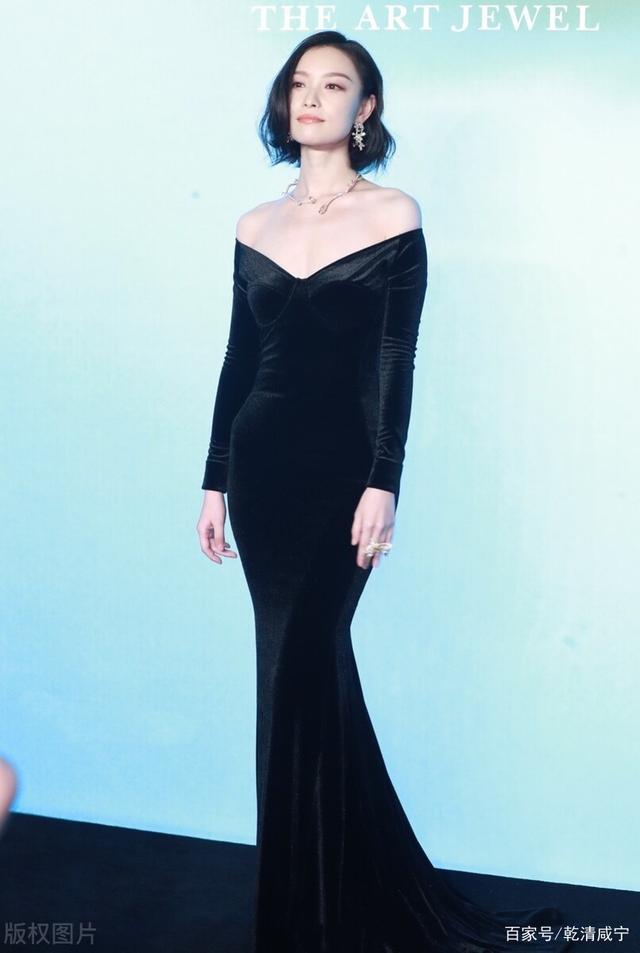

Detected person with confidence 0.908 at location [0.01, 756.09, 16.66, 837.82]
Detected person with confidence 0.923 at location [193.15, 28.65, 504.45, 948.36]


In [22]:

url = "https://pics4.baidu.com/feed/aa18972bd40735fa71a090ed7cde71b90e2408a8.jpeg@f_auto?token=431927c92b3ed1db30e7e085179a214c"
url = "https://pics5.baidu.com/feed/622762d0f703918f0107216bb7b2589d5beec4d3.jpeg@f_auto?token=07aec53f7f48e65801249a8cc9ebf196"
image = Image.open(requests.get(url, stream=True).raw)

display(image)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}")

tensor(1) 1
Detected person with confidence 0.908 at location [0.01, 756.09, 16.66, 837.82]
tensor(1) 1
Detected person with confidence 0.923 at location [193.15, 28.65, 504.45, 948.36]


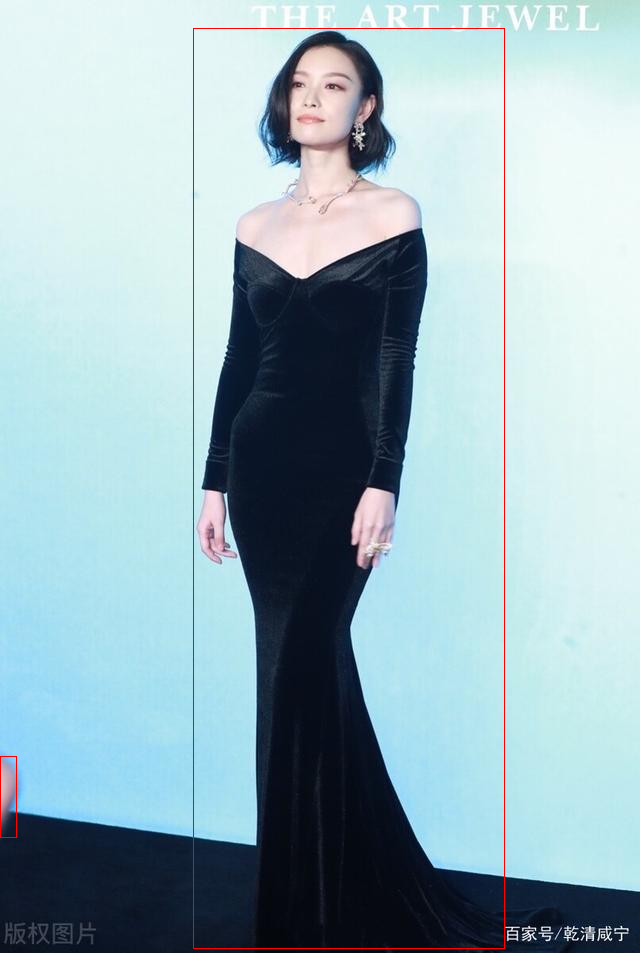

In [23]:
import copy
from PIL import Image, ImageDraw
img1 = copy.deepcopy(image)
img2 = ImageDraw.Draw(img1)  
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(label, label.item())
    print(f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}")
    
    # img2.rectangle(box, fill ="#ffff33", outline ="red")
    img2.rectangle(box, outline ="red")

display(img2._image)

In [12]:
type(img1)

PIL.JpegImagePlugin.JpegImageFile

# deepface

## doc

* https://github.com/serengil/deepface